In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
df.shape

(891, 15)

<Axes: xlabel='alive', ylabel='count'>

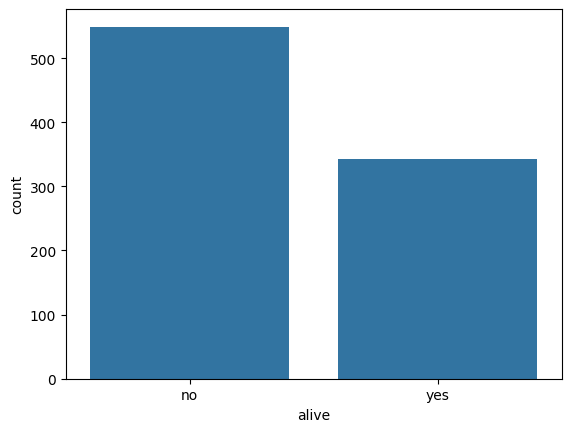

In [10]:
sns.countplot(x="alive",data=df)

<Axes: ylabel='age'>

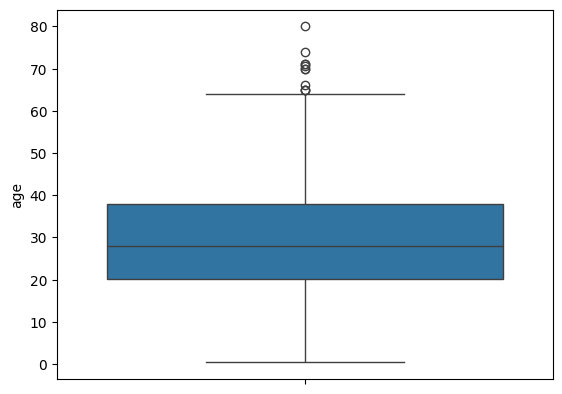

In [11]:
sns.boxplot(df['age'])

<Axes: xlabel='class', ylabel='age'>

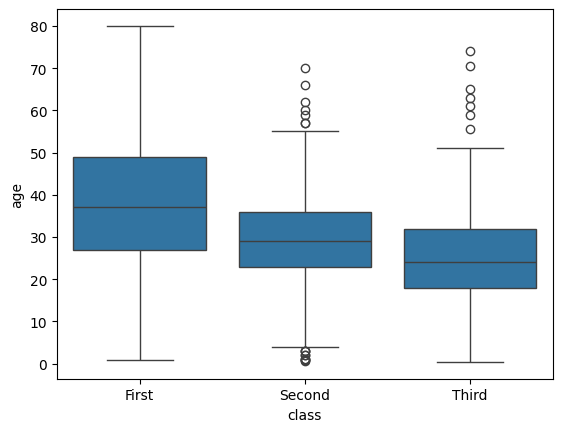

In [14]:
sns.boxplot(x='class',y='age',data=df)

<Axes: xlabel='survived', ylabel='fare'>

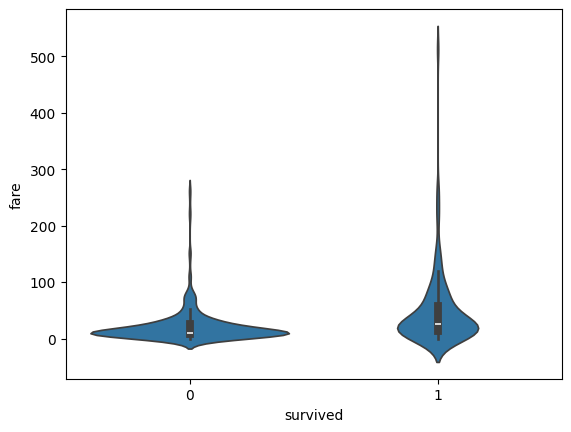

In [15]:
sns.violinplot(x='survived',y='fare',data=df)

<Axes: >

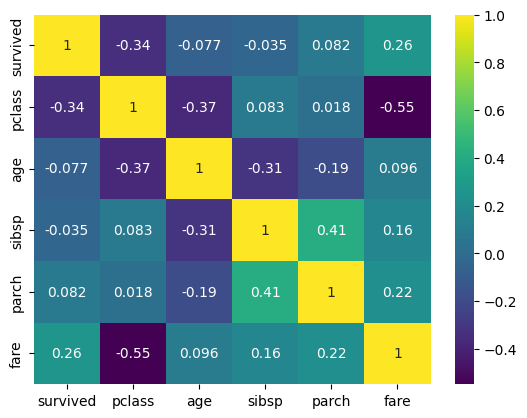

In [18]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='viridis')

<Axes: xlabel='sex', ylabel='age'>

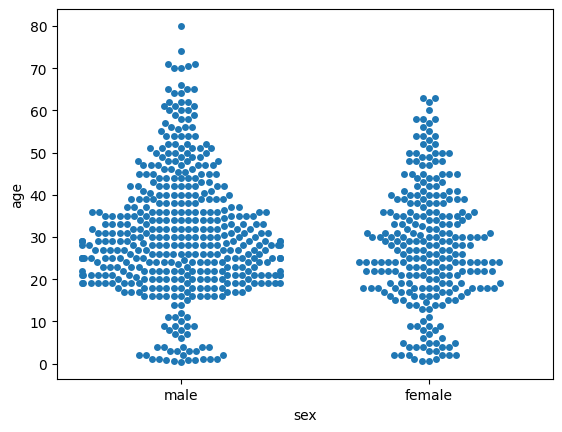

In [19]:
sns.swarmplot(x='sex',y='age',data=df)

<Axes: xlabel='age', ylabel='Count'>

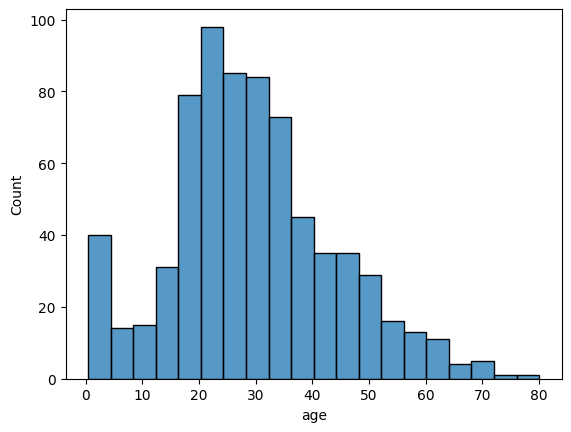

In [20]:
sns.histplot(df['age'])

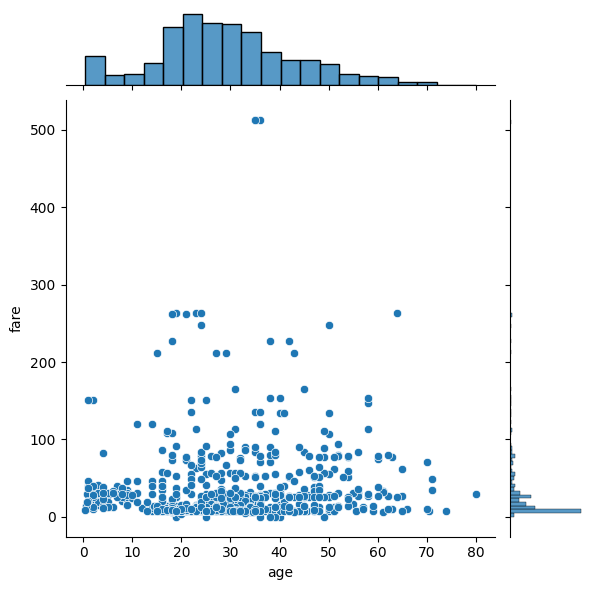

In [21]:
sns.jointplot(data=df, x="age", y="fare")

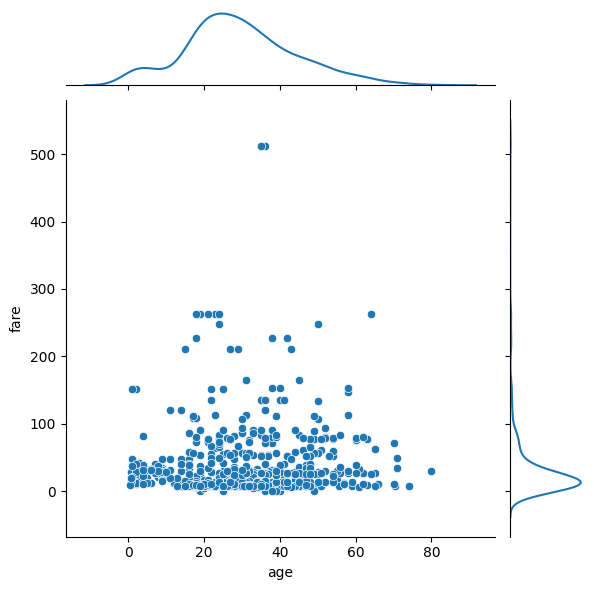

In [22]:
g=sns.JointGrid(data=df,x='age',y='fare')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


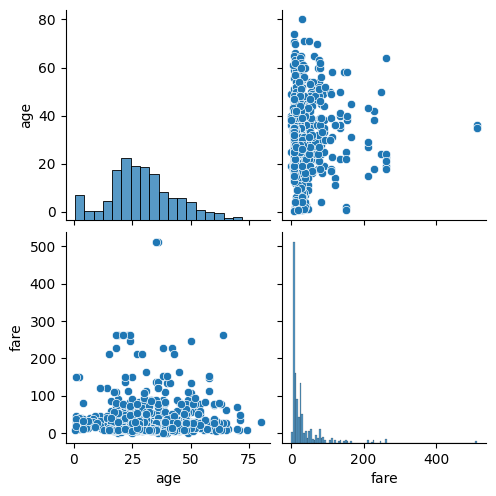

In [24]:
sns.pairplot(df[['age','fare']])

In [25]:
df_numeric = df[["age", "fare", "pclass"]].dropna()
df_numeric.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


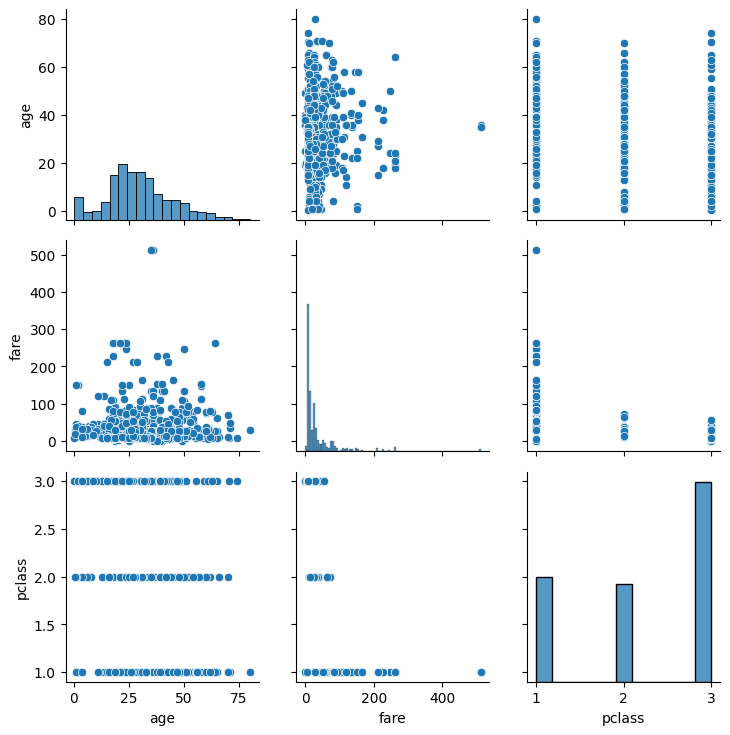

In [26]:
g = sns.PairGrid(df_numeric)

g.map_diag(sns.histplot, fill=True)
g.map_offdiag(sns.scatterplot)
plt.show()

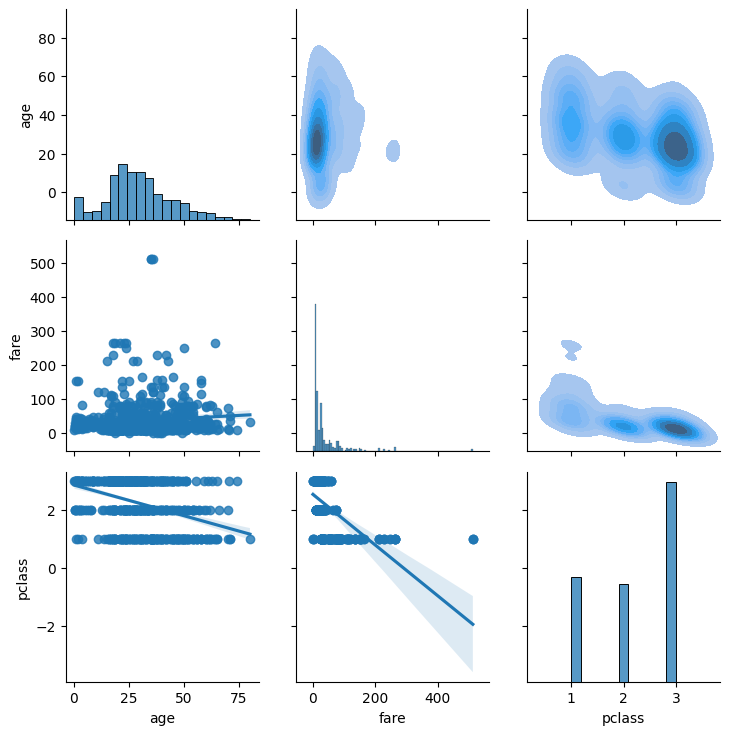

In [27]:
g = sns.PairGrid(df_numeric)
g.map_upper(sns.kdeplot, fill=True)
g.map_lower(sns.regplot)
g.map_diag(sns.histplot, fill=True)
plt.show()


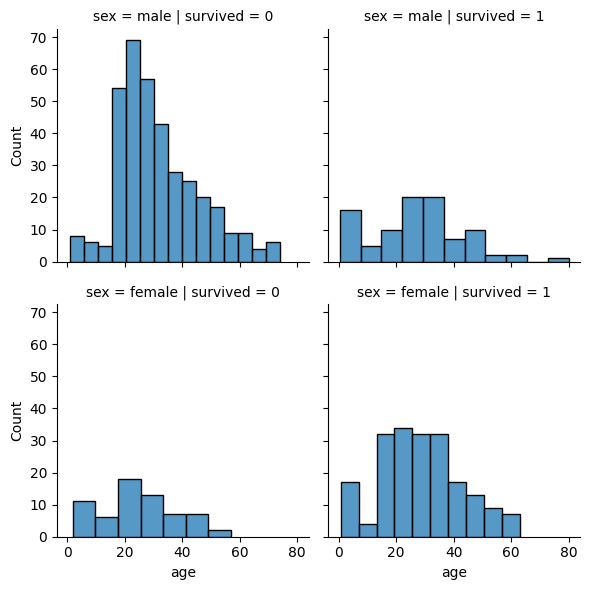

In [28]:
g=sns.FacetGrid(df,row='sex',col='survived')
g.map(sns.histplot,"age")

<Axes: xlabel='class', ylabel='fare'>

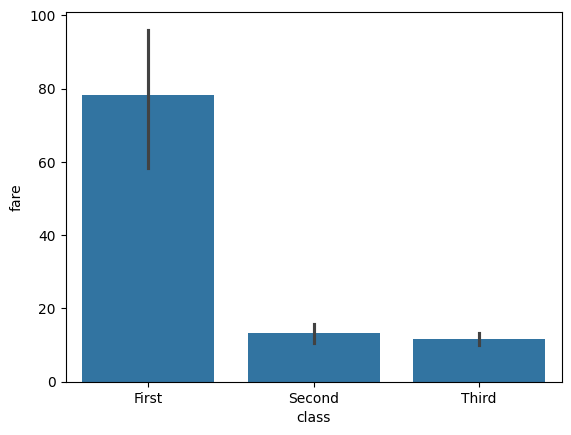

In [29]:
sns.barplot(x="class",y='fare',data=df,estimator=np.std)

In [31]:
import plotly.express as px
import plotly.graph_objects as go

In [32]:
px.pie(df, names="survived", title="Survival Distribution")

In [33]:
px.violin(df, x="survived", y="age", box=True, points="all", title="Age Distribution by Survival").show()


In [35]:
import plotly.express as px
import pandas as pd

# Dummy population data
world_data = pd.DataFrame({
    'country': ['India', 'United States', 'China', 'Germany', 'Brazil'],
    'iso_alpha': ['IND', 'USA', 'CHN', 'DEU', 'BRA'],
    'population': [1400, 330, 1440, 83, 213]
})

fig = px.choropleth(world_data,
                    locations='iso_alpha',
                    color='population',
                    hover_name='country',
                    color_continuous_scale='viridis',
                    title='Dummy World Population')
fig.show()


In [36]:
usa_data = pd.DataFrame({
    'state': ['CA', 'TX', 'NY', 'FL', 'IL'],
    'sales': [300, 250, 220, 210, 180]
})

fig = px.choropleth(usa_data,
                    locations='state',
                    locationmode='USA-states',
                    color='sales',
                    scope='usa',
                    title='Dummy Sales by US State')
fig.show()
